<a href="https://colab.research.google.com/github/KhalidAlblooshi/Foundations_Of_Data_Science/blob/main/Activity3_KhalidHussainAlblooshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [4]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [5]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [6]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-6-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [7]:
#merged_data.dtypes

In [8]:
pollution_data = merged_data[['pm10','neighborhood']]

In [9]:
pollution_data.shape[0]

118495

In [10]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [11]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

In [21]:
# Convert the DataFrame to a Datascience Table
joined_table = Table.from_df(pollution_data, keep_index=False)

# Display the table
joined_table


pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park
0.73,Bronx Park
1.22,Bronx Park
5.82,Bronx Park
11.04,Bronx Park
1.29,Bronx Park


the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [12]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [13]:
pollution_data['pm10'].min()

0.0

In [14]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [15]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [16]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [36]:
joined_table = joined_table.where('pm10', are.below(300))

In [37]:
len(joined_table)

2

In [38]:
joined_table.num_rows

117356

In [39]:
sample_size = int(joined_table.num_rows * 0.10)  # Calculate 10% of the data
sampled_data = joined_table.sample(sample_size, with_replacement=False)
# print size of the table
print(f"Size of the sampled data: {sampled_data.num_rows}")

Size of the sampled data: 11735


In [40]:
mean_pm10_sample = np.mean(sampled_data.column('pm10'))
print(f"Mean PM10 value for the sample: {mean_pm10_sample}")

Mean PM10 value for the sample: 16.47054026416702


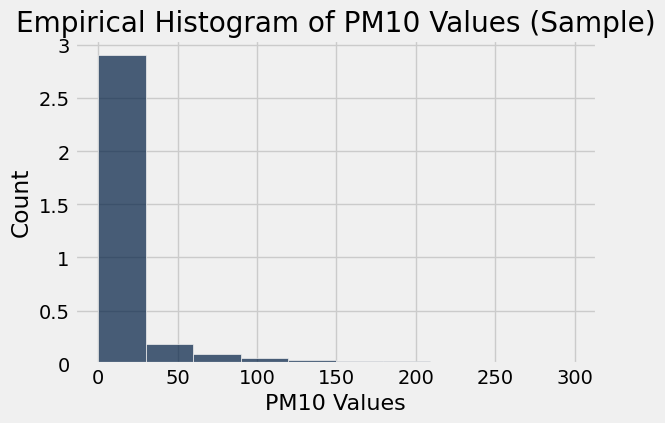

In [41]:
sampled_data.hist('pm10', bins=10)
plt.xlabel('PM10 Values')
plt.ylabel('Count')
plt.title('Empirical Histogram of PM10 Values (Sample)')
plt.show()

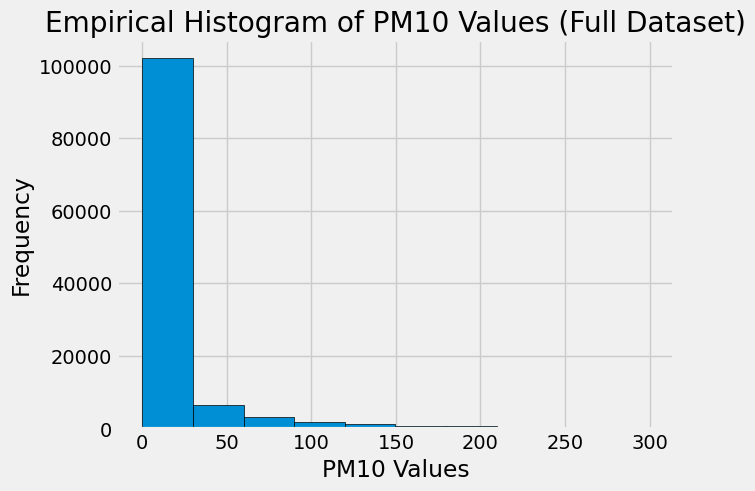

In [42]:
plt.hist(joined_table.column('pm10'), bins=10, edgecolor='black')
plt.xlabel('PM10 Values')
plt.ylabel('Frequency')
plt.title('Empirical Histogram of PM10 Values (Full Dataset)')
plt.show()

**Comment:**
Both the sample and full dataset histograms display a similar right-skewed shape, indicating the sample is representative of the overall PM10 distribution. This suggests our sample statistics will likely be good estimates of the population parameters.

## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

In [45]:
# Generate 5,000 bootstrap samples
bootstrap_medians = []
for _ in range(5000):
    bootstrap_sample = joined_table.sample(with_replacement=True)
    bootstrap_medians.append(np.median(bootstrap_sample.column('pm10')))

# Compute the 95% confidence interval
lower_bound = np.percentile(bootstrap_medians, 2.5)
upper_bound = np.percentile(bootstrap_medians, 97.5)

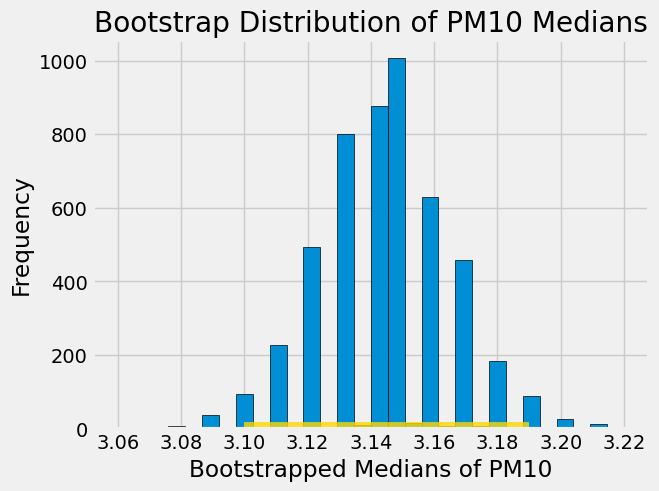

95% Confidence Interval for the Population Median PM10: [3.10, 3.19]
Interpretation: We are 95% confident that the true median PM10 value for the entire population lies within this interval.


In [48]:
# Visualize the results
plt.hist(bootstrap_medians, bins=30, edgecolor='black')
plt.xlabel('Bootstrapped Medians of PM10')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of PM10 Medians')
plt.plot([lower_bound, upper_bound], [0, 0], color='gold', lw=10, alpha=0.8)
plt.show()

# Report the confidence interval and interpretation
print(f"95% Confidence Interval for the Population Median PM10: [{lower_bound:.2f}, {upper_bound:.2f}]")
print("Interpretation: We are 95% confident that the true median PM10 value for the entire population lies within this interval.")

## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

In [49]:
bootstrap_means = []
for _ in range(5000):
    bootstrap_sample = joined_table.sample(with_replacement=True)
    bootstrap_means.append(np.mean(bootstrap_sample.column('pm10')))

lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"95% Confidence Interval for the Average PM10: [{lower_bound:.2f}, {upper_bound:.2f}]")

95% Confidence Interval for the Average PM10: [15.97, 16.39]


In [50]:
null_hypothesis_value = 20  # The hypothesized average PM10 level

if lower_bound <= null_hypothesis_value <= upper_bound:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("Interpretation: There is no significant evidence to suggest that the average PM10 level in the population is different from 20 μg/m³.")
else:
    print("Conclusion: Reject the null hypothesis.")
    print("Interpretation: There is significant evidence to suggest that the average PM10 level in the population is different from 20 μg/m³.")

Conclusion: Reject the null hypothesis.
Interpretation: There is significant evidence to suggest that the average PM10 level in the population is different from 20 μg/m³.


Based on the results of the confidence interval and hypothesis test, you can interpret whether the data supports the null or alternative hypothesis. If the confidence interval contains the null hypothesis value of 20 μg/m³, you would conclude that there is no significant evidence to suggest the average PM10 level differs from 20 μg/m³, supporting the null hypothesis.

However, if the confidence interval does not contain 20 μg/m³, you would reject the null hypothesis and conclude that there is significant evidence to suggest the average PM10 level is different from 20 μg/m³, supporting the alternative hypothesis. Remember to replace the comments with the actual results you obtain from running the code. I hope this helps you complete the task! Let me know if you have any other questions.

## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


In [51]:
neighborhood_means = joined_table.group('neighborhood', np.mean).sort('pm10 mean', descending=True)
top_3_neighborhoods = neighborhood_means.take(np.arange(3)).column('neighborhood')
print(top_3_neighborhoods)

['Crotona Park' 'Pelham Bay' 'Tremont']


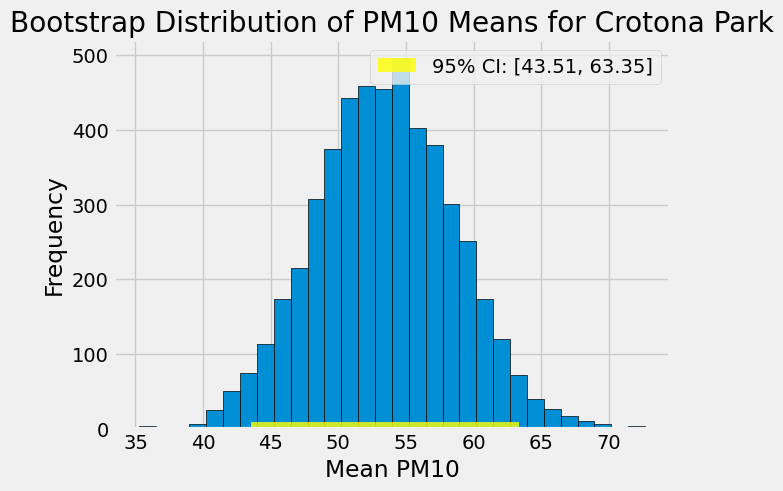

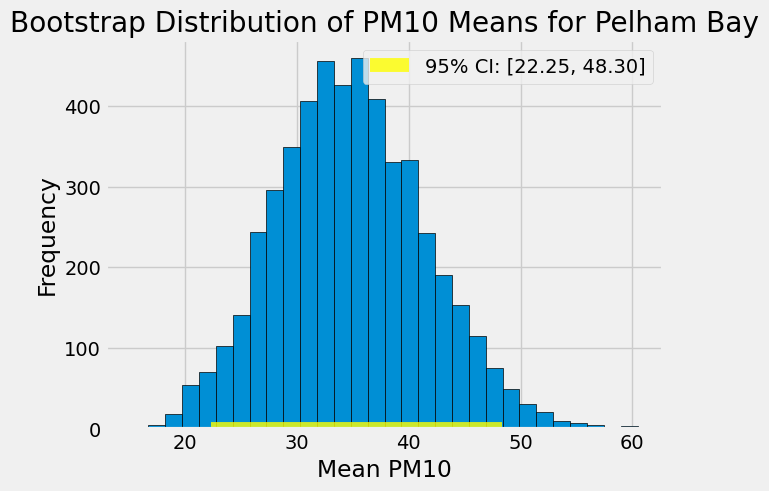

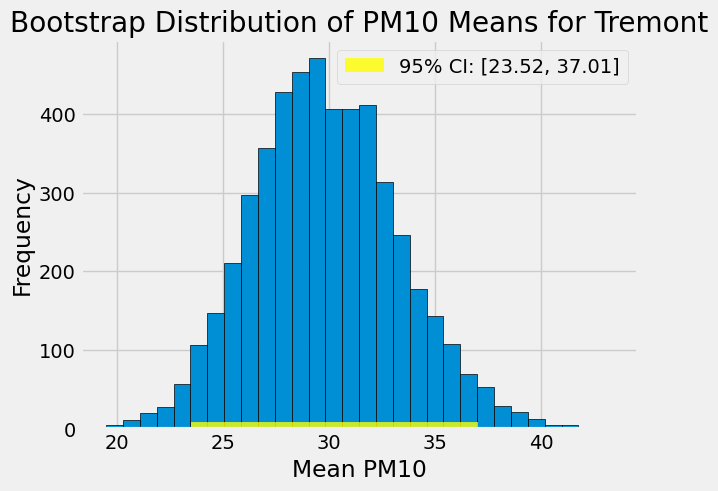

In [56]:
for neighborhood in top_3_neighborhoods:
    bootstrap_means = []
    for _ in range(5000):
        bootstrap_sample = joined_table.where('neighborhood', are.equal_to(neighborhood)).sample(with_replacement=True)
        bootstrap_means.append(np.mean(bootstrap_sample.column('pm10')))

    lower_bound = np.percentile(bootstrap_means, 2.5)
    upper_bound = np.percentile(bootstrap_means, 97.5)

    plt.hist(bootstrap_means, bins=30, edgecolor='black')
    # Modified line plotting
    plt.plot([lower_bound, upper_bound], [0, 0], color='yellow', lw=10, alpha=0.8, label=f'95% CI: [{lower_bound:.2f}, {upper_bound:.2f}]')
    plt.title(f'Bootstrap Distribution of PM10 Means for {neighborhood}')
    plt.xlabel('Mean PM10')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.